In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
import json
with open('./data/kaggle.json') as fp:
  config_str = fp.read()
config = json.loads(config_str)

In [3]:
username = config['username']
password = config['key']

In [4]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = password


In [5]:
!kaggle datasets download aljarah/xAPI-Edu-Data


  0%|          | 0.00/5.54k [00:00<?, ?B/s]
100%|██████████| 5.54k/5.54k [00:00<00:00, 2.29MB/s]


In [5]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('./zip')


In [6]:
from glob import glob
glob('*.zip')

['xAPI-Edu-Data.zip']

In [ ]:
import zipfile
fantasy_zip = zipfile.ZipFile(glob('*.zip'))
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip')

#fantasy_zip.close()


# 학생의 학업 성과 데이터 세트

### 데이터셋 설명
1. gender: 성별 - 학생의 성별(M: '남성' F:'여성')
2. National - 학생의 국적(명목:'쿠웨이트','레바논','이집트','사우디아라비아','미국','요르단','베네수엘라','이란','튀니스','모로코','시리아 ',' 팔레스타인', '이라크', '리비아')
3. 출생지 - 학생의 출생지(명칭:'쿠웨이트','레바논','이집트','사우디아라비아','미국','요르단','베네수엘라','이란','튀니스','모로코 ','시리아','팔레스타인','이라크','리비아')
4. 교육 단계 - 교육 수준 학생이 속한 (명목: '하위', '중학교', '고등학교')
5. 학년 수준 - 학년 학생이 속한 (명목: 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07 ', 'G-08', 'G-09','G-10', 'G-11', 'G-12')
6. 섹션 ID - 학급 학생이 속한(명칭:'A','B','C')
7. 주제-과정 주제(명목:'영어','스페인어', '프랑스어','아랍어','IT','수학','화학', '생물학', '과학','역사',' 꾸란 ', '지질학')
8. 학기 - 학년도 학기(명목:'첫 번째','두 번째')
9. 학생을 책임지는 학부모(명칭: '엄마', '아빠')
10. 들린 손 - 학생이 교실에서 손을 든 횟수(숫자:0-100)
11. 방문한 리소스 - 학생이 코스 콘텐츠를 방문한 횟수(숫자:0-100)
12. 공지사항 보기-학생이 새 공지사항을 확인하는 횟수(숫자:0-100)
13. 토론 그룹 - 학생이 토론 그룹에 참여하는 횟수(숫자:0-100)
14. 학부모 응답 설문조사 - 학부모가 학교에서 제공한 설문조사에 응답했는지 여부(명목: '예', '아니오')
15. 학부모 학교 만족도 - 학부모의 학교 만족도(명목:'예','아니오')
16. 결석일수-학생별 결석일수(명목 : 7세 이상, 7세 미만)
17. class: 학생의 성적 등급(L:낮음, M:보통, H:높음)

### class가 3개 이기 때문에 

### 학생들은 총 성적/점수에 따라 세 가지 숫자 간격으로 분류됩니다.
- L: 저수준: 간격에는 0에서 69 사이의 값이 포함됩니다.
- M: 중간 수준: 간격에는 70에서 89 사이의 값이 포함됩니다.
- H: 상위 수준: 간격에는 90-100 사이의 값이 포함됩니다.

In [10]:
import pandas as pd
df= pd.read_csv('./data/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [11]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

((480, 17), None)

In [12]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [13]:
df[df['raisedhands']==100]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
95,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,100,80,2,70,No,Bad,Under-7,H
138,F,Jordan,Egypt,MiddleSchool,G-07,A,Quran,F,Mum,100,80,95,90,No,Bad,Under-7,H
139,M,Jordan,USA,MiddleSchool,G-07,A,Quran,F,Mum,100,85,85,70,No,Bad,Under-7,M
146,F,lebanon,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Good,Under-7,H
149,F,Jordan,lebanon,MiddleSchool,G-07,A,Quran,S,Mum,100,75,50,70,Yes,Bad,Under-7,H
152,F,SaudiArabia,USA,HighSchool,G-11,B,Science,S,Father,100,91,98,40,Yes,Bad,Under-7,H


In [14]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [16]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [20]:
countList = ['gender', 'PlaceofBirth', 'NationalITy']

for x in countList:
    print('-'+x+'counts----------------')
    print(df[x].value_counts())

-gendercounts----------------
M    305
F    175
Name: gender, dtype: int64
-PlaceofBirthcounts----------------
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
-NationalITycounts----------------
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64


In [21]:
## 데이터 컬럼중 수치형 데이터 확인 후 자동으로 그 컬럼을 히스토그램을 그리게 하기

-raisedhands-hist----------------


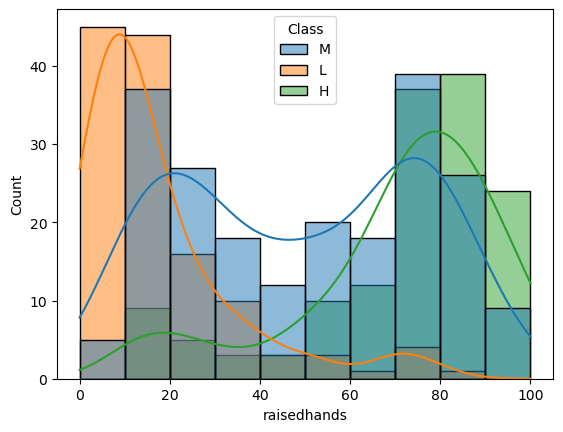

-VisITedResources-hist----------------


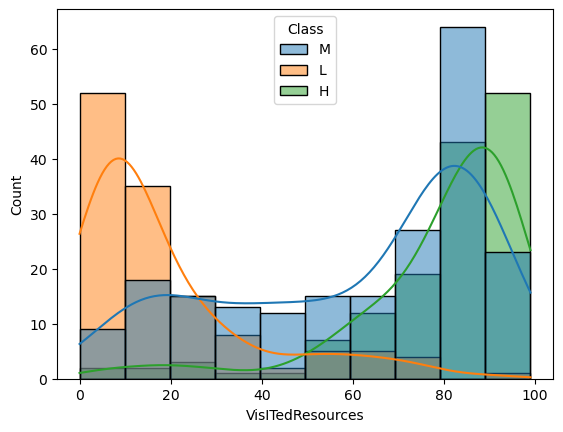

-Discussion-hist----------------


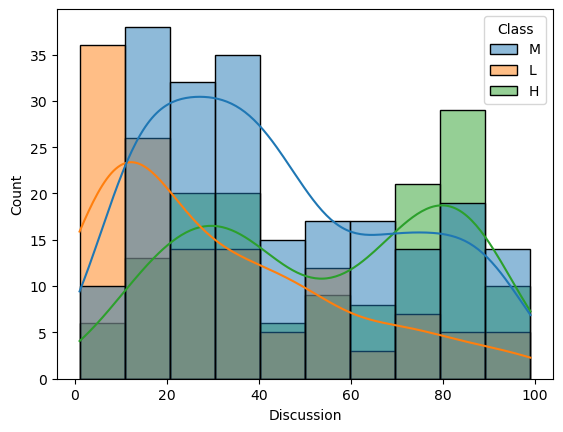

In [26]:
histList = ['raisedhands', 'VisITedResources', 'Discussion']

import seaborn as sns
import matplotlib.pyplot as plt

for x in histList:
    print('-'+x+'-hist----------------')
    sns.histplot(x=x, data=df, hue='Class', kde=True)
    plt.show()

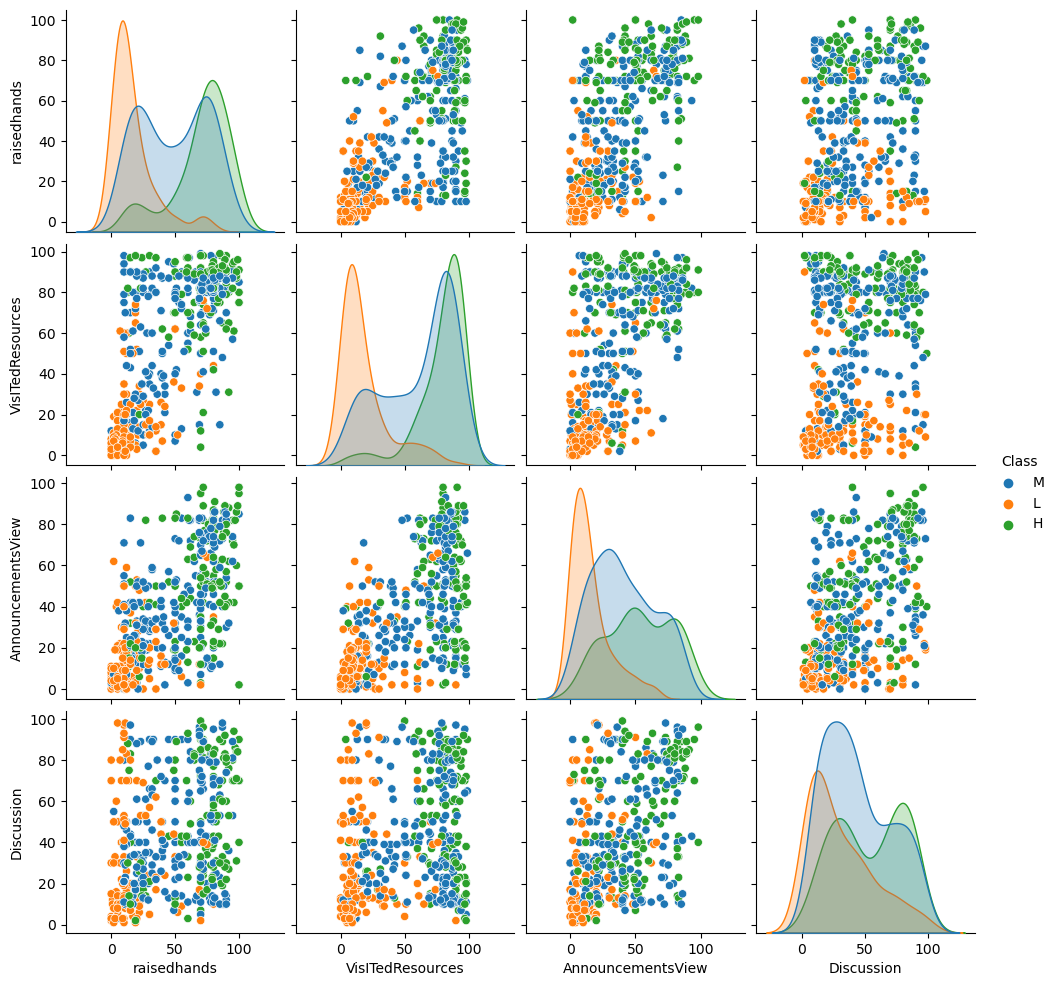

In [29]:
## 다양한 시각화, 
# jointplot, class단위로 확인 손든횟수, 공지사항을 본 횟수간의 차트 작성

sns.pairplot(df, hue='Class')
plt.show()

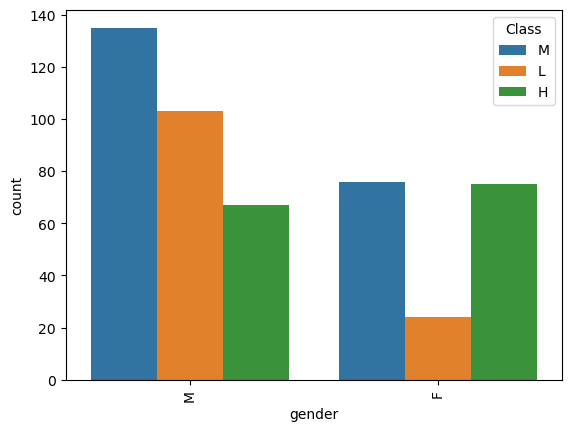

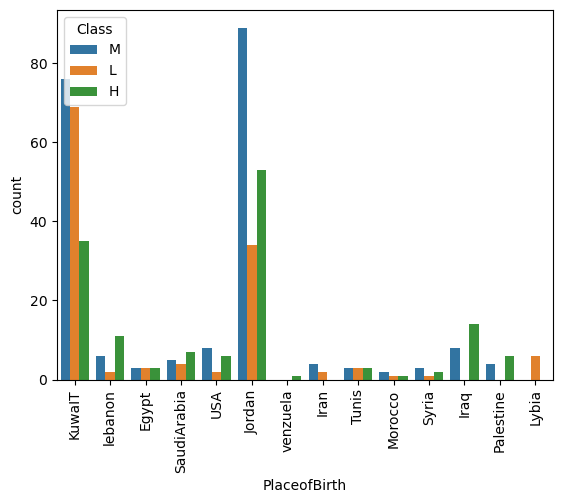

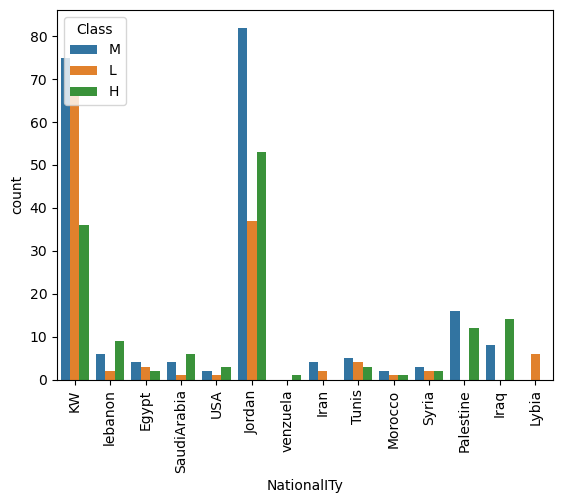

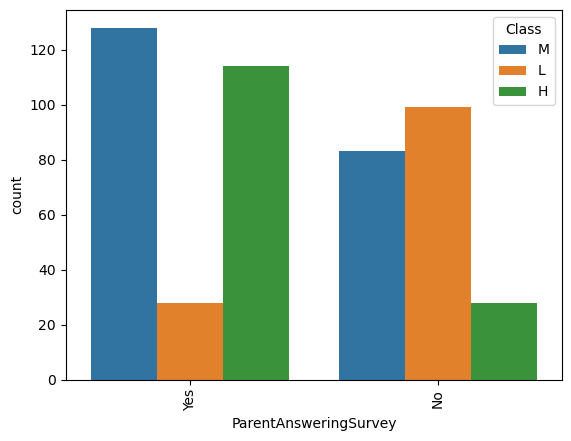

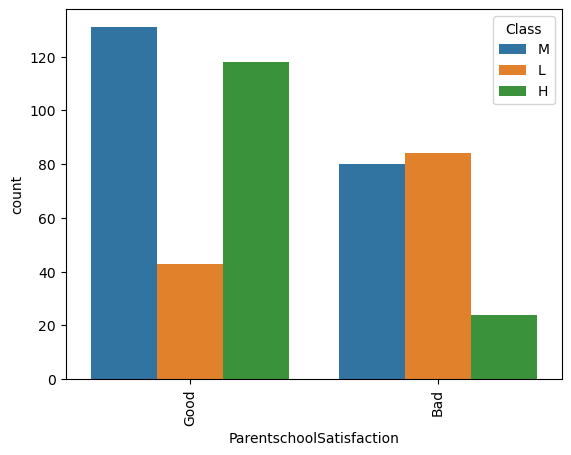

In [37]:
## 추후에는 컬럼의 성격이 object인 자료를 모으고 그중 class만 제외해서 작업
countList = ['gender', 'PlaceofBirth', 'NationalITy', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction']
for x in countList:
    sns.countplot(x=x, hue='Class', data=df)
    plt.xticks(rotation=90)
    plt.show()


In [39]:
# 범주형 데이터 수치형으로 변경
# y 값은 변환해야 함, Class(L, M, H)를 레벨인코딩하면 0, 1, 2로 변환됨

# 방법1 
df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


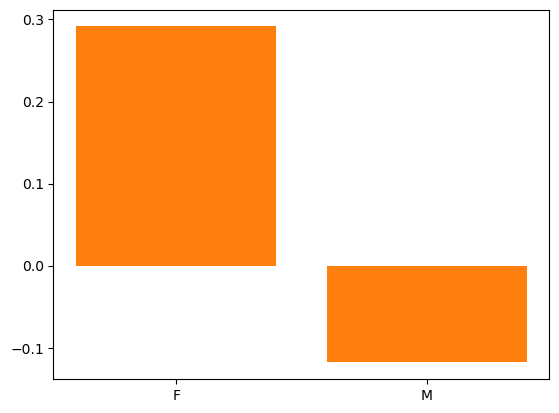

In [42]:
# 숫자로 y값을 변경해 여러가지 작업 가능
tmp = df.groupby('gender').mean()['Class_value']
plt.bar(tmp.index, tmp)
plt.show()

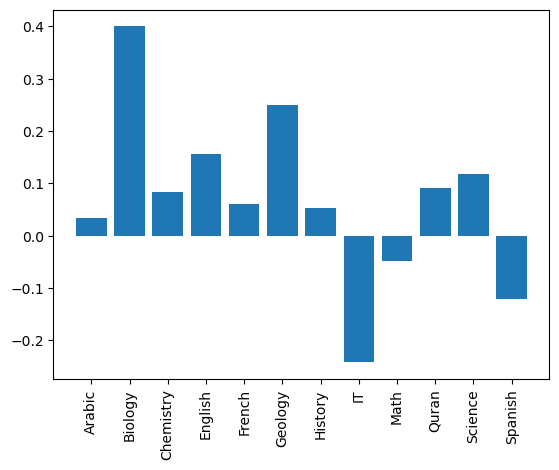

In [44]:
# 숫자로 y값을 변경해 여러가지 작업 가능
tmp = df.groupby('Topic').mean()['Class_value']
plt.bar(tmp.index, tmp)
plt.xticks(rotation=90)
plt.show()

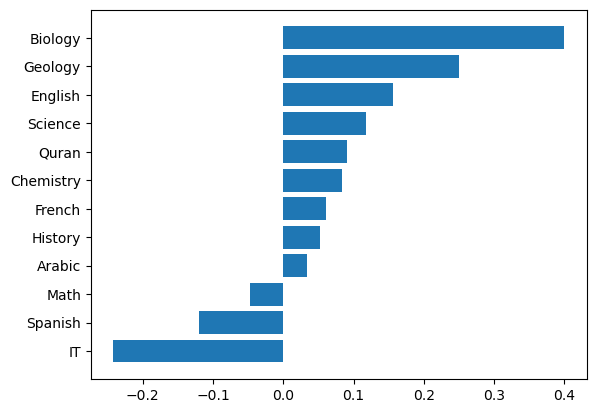

In [46]:
# 숫자로 y값을 변경해 여러가지 작업 가능
tmp = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.barh(tmp.index, tmp)
plt.show()

In [47]:
# x값도 변환해야 함

# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)
y = df['Class']

In [48]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [52]:
# 훈련 학습 데이터 분리
# 범주형 데이터는 스케일링 안하는게 좋음
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=222)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((336, 59), (336,), (144, 59), (144,))

In [54]:
## 자료는 분류모델임
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
# 리포트 출력, 외에도 혼돈행렬 사각형 그래프, 성공율

from sklearn.metrics import classification_report

pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.63      0.79      0.70        34
           L       0.88      0.82      0.85        45
           M       0.75      0.68      0.71        65

    accuracy                           0.75       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.76      0.75      0.75       144



In [60]:
## XGboost 모델 생성, w,b 값을 자동변경하며 작업함, 단점 속도가 느림
from xgboost import XGBClassifier

model_xgb=XGBClassifier()

model_xgb.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# 전체적인 결과가 좋음
pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           H       0.70      0.88      0.78        34
           L       0.85      0.87      0.86        45
           M       0.82      0.69      0.75        65

    accuracy                           0.79       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.80      0.79      0.79       144



In [63]:
## 각 변수의 기여도 확인(모델계수)

model_lr.classes_, model_xgb.classes_

(array(['H', 'L', 'M'], dtype=object), array(['H', 'L', 'M'], dtype=object))

In [64]:
model_lr.coef_ #X값

array([[ 3.11601497e-02,  1.53653959e-02,  1.83529632e-02,
         4.52942698e-03, -1.03786590e+00, -1.24871403e-01,
         4.40969376e-02, -3.95853308e-01, -3.35498104e-01,
        -6.11550799e-02,  1.03240001e-02, -2.40048757e-01,
         3.20510181e-02, -1.38891938e-01, -1.06429206e-01,
        -7.82488458e-04, -1.18781969e-01,  3.56777423e-02,
        -1.24871403e-01,  4.40969376e-02, -8.37430032e-01,
        -2.49430151e-01, -6.11550799e-02,  1.03240001e-02,
        -6.85005661e-02,  1.95298097e-01, -1.25195304e-01,
        -9.12132223e-03, -1.58977855e-01, -8.99849241e-02,
         3.56777423e-02, -6.58857729e-01, -5.30610346e-01,
        -2.89752477e-01, -5.90534576e-02,  2.56147436e-02,
        -2.81831647e-01, -4.02640825e-01, -1.36208935e-01,
        -2.54790022e-02, -1.54273599e-01, -1.40244109e-01,
         9.79948361e-02, -2.30209943e-01,  2.79252966e-01,
         3.35974088e-02, -1.58783015e-01, -5.10183144e-01,
        -3.24615790e-01, -2.34424556e-01, -2.97921288e-0

In [67]:
print(model_lr.coef_.shape) # X_train 데이터의 w값 임
print(X_train.shape)

(3, 59)
(336, 59)


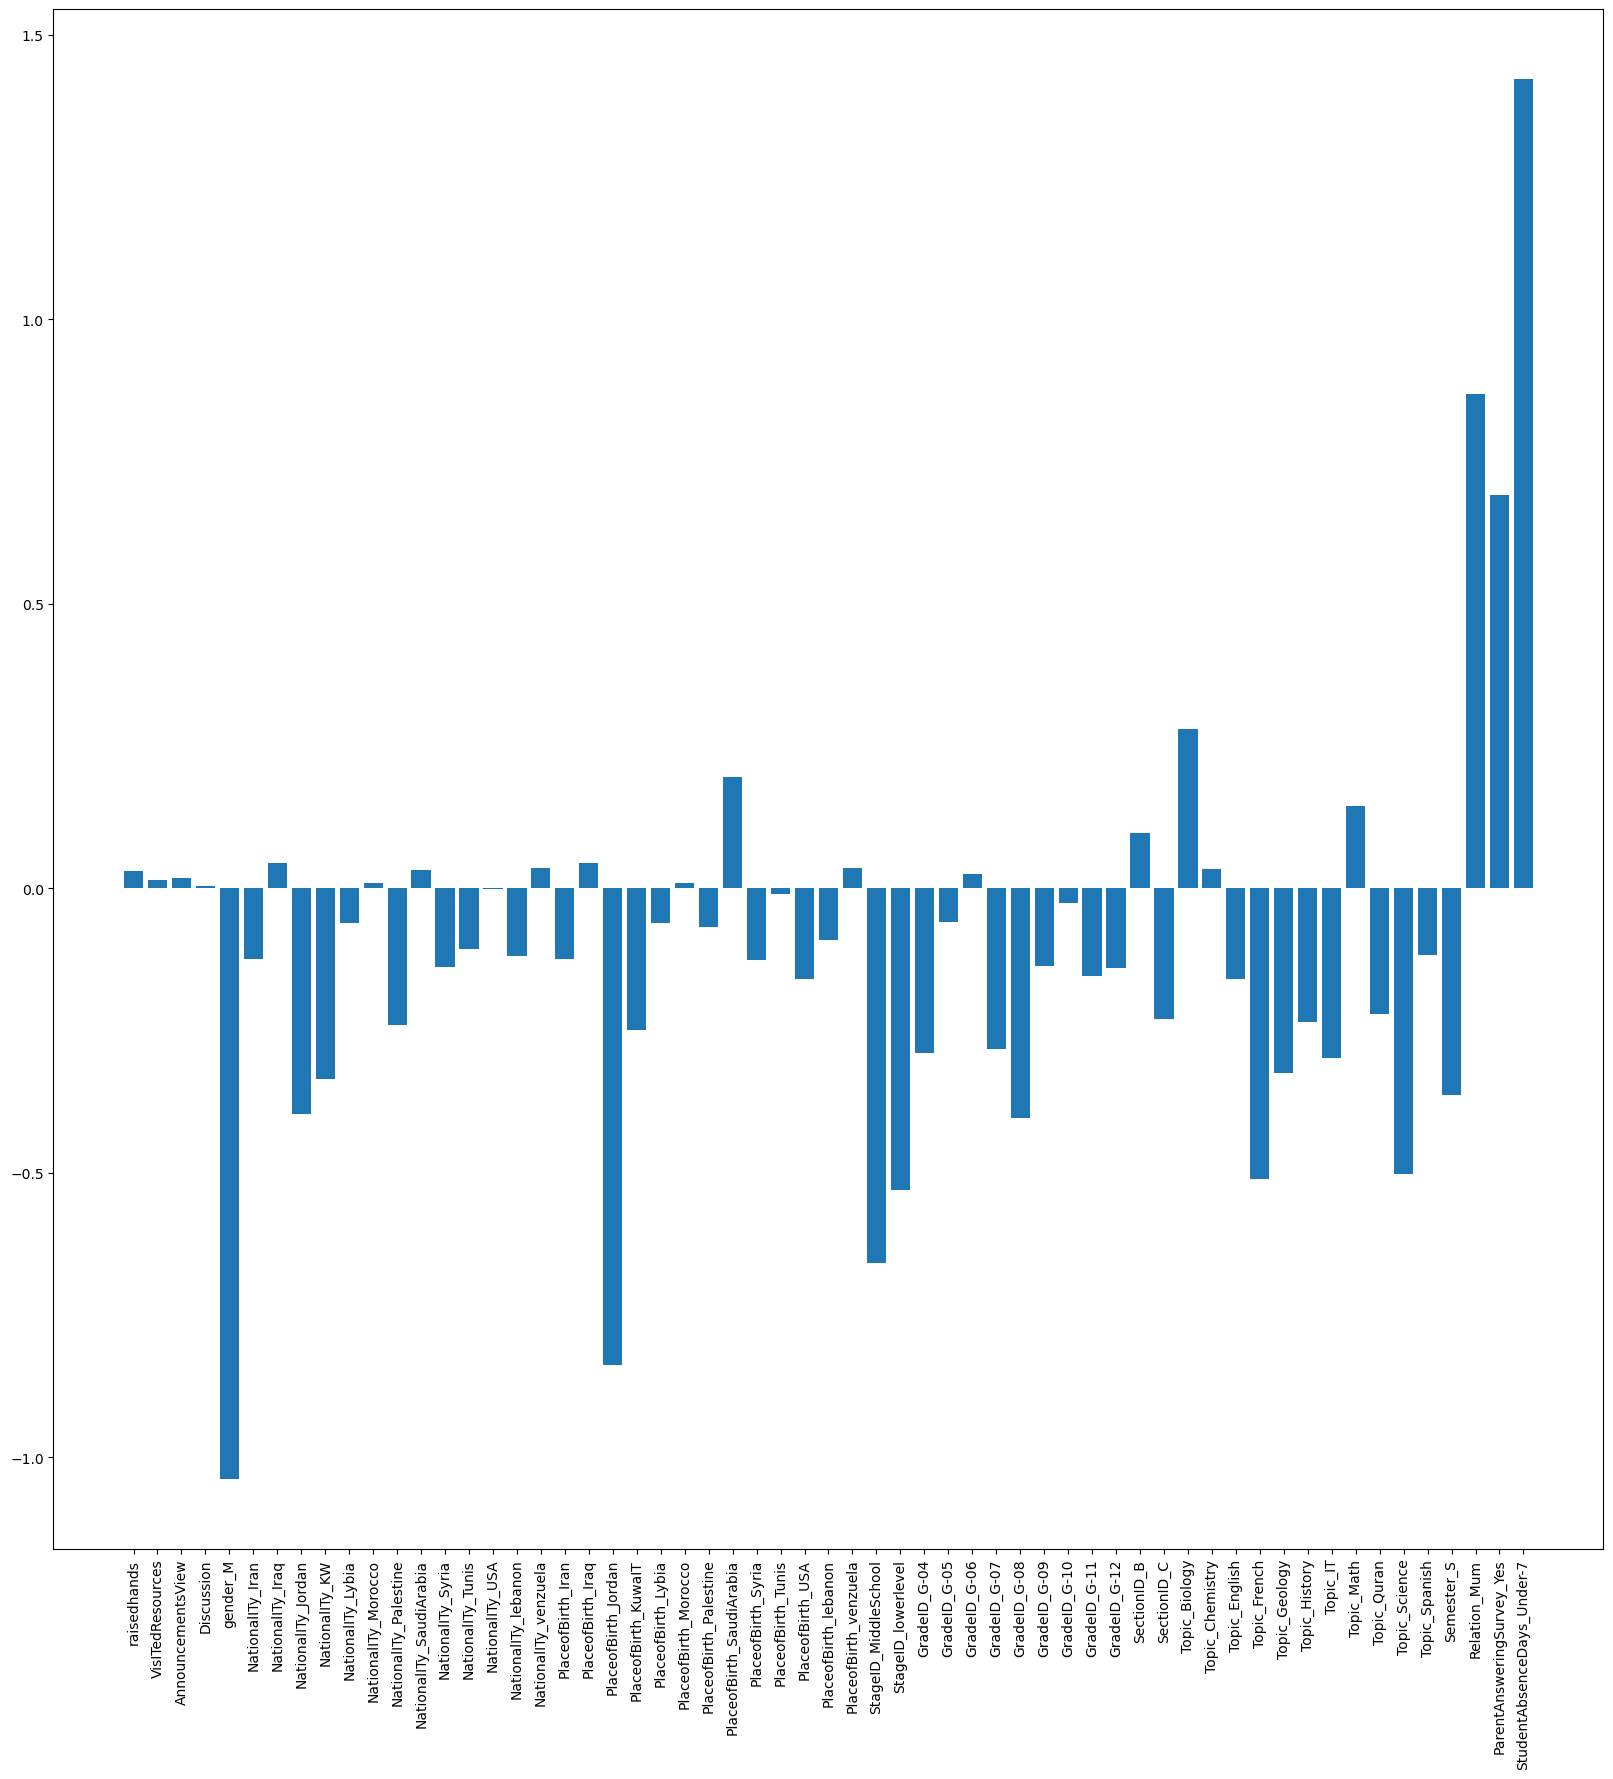

In [75]:
X_train.columns
plt.figure(figsize=(20,20))
plt.bar(X_train.columns, model_lr.coef_[0,])
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x2000 with 0 Axes>

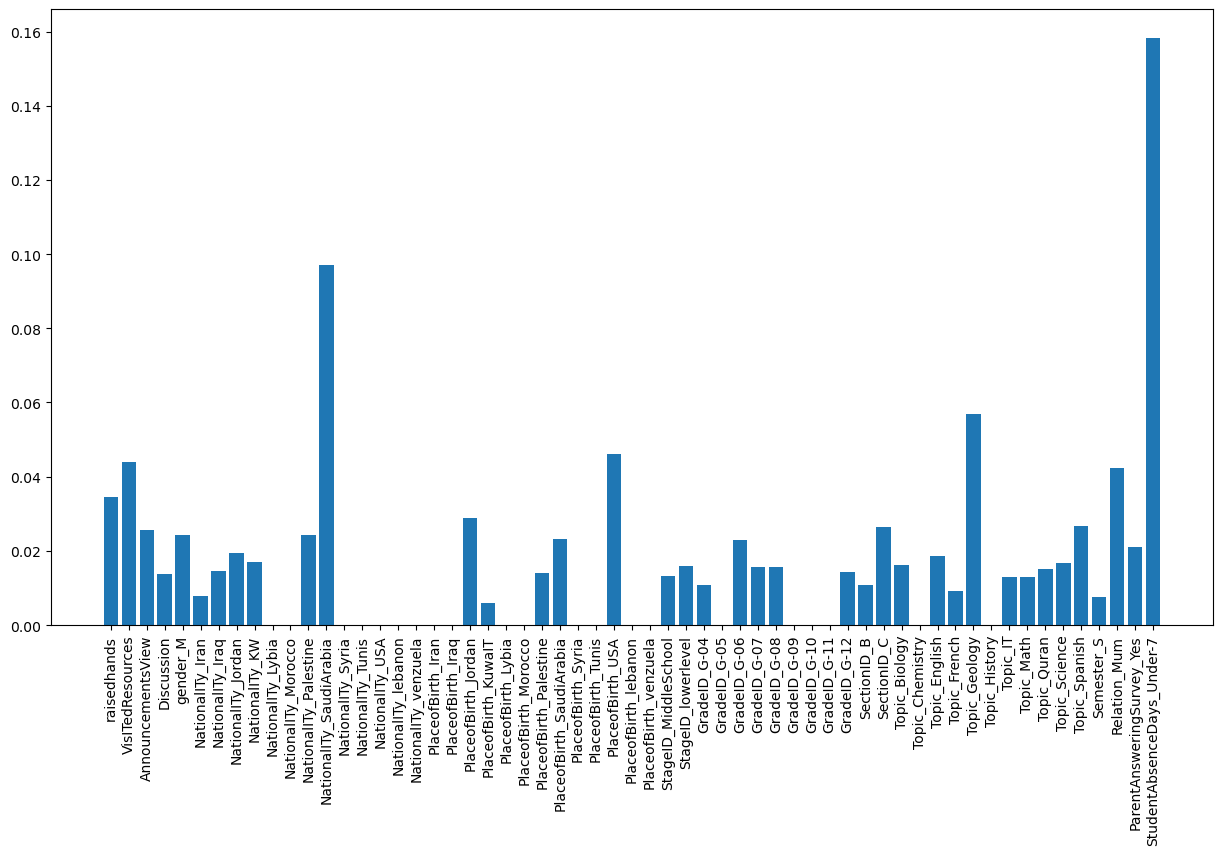

In [77]:
# xgboost 모델의 feature_imp

fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()
